# Task-1 Predict Restaurant Ratings

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,median_absolute_error,r2_score,max_error,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Yashoda\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Data Cleaning

In [3]:
cols_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality',
    'Locality Verbose', 'Longitude', 'Latitude', 'Switch to order menu'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)



# Handle Missing Values

In [4]:
df = df.dropna(subset=['Aggregate rating'])
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


# Encoding Categorical Features

In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


#  Splitting the Data

In [6]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train the Model

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluate the Model

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

try:
    msle = mean_squared_log_error(y_test, y_pred)
except ValueError:
    msle = "Not applicable (y_pred or y_test has negative values)"

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Median Absolute Error: {medae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {max_err:.4f}")
print(f"Mean Squared Log Error (MSLE): {msle}")

Mean Squared Error (MSE): 0.0321
Root Mean Squared Error (RMSE): 0.1792
Mean Absolute Error (MAE): 0.1210
Mean Absolute Percentage Error (MAPE): 0.0374
Median Absolute Error: 0.0840
R² Score: 0.9859
Max Error: 0.7720
Mean Squared Log Error (MSLE): 0.0018782383479491879


# Visualize Feature Importances

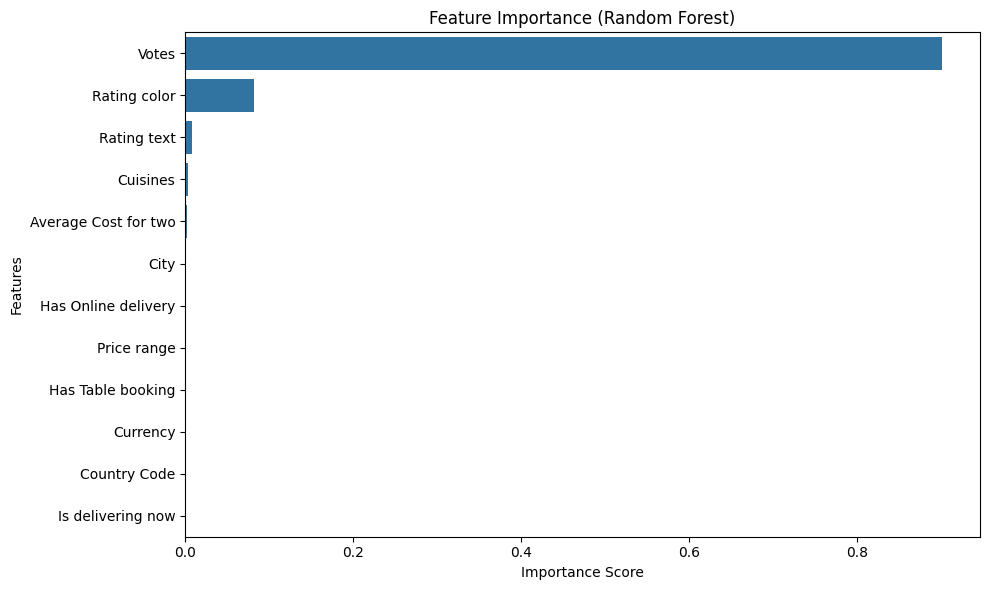

In [9]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.sort_values(ascending=False), y=feature_imp.sort_values(ascending=False).index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()